In [15]:
import numpy
import numba
from numba import jit
from math import pi
from matplotlib import pyplot
%matplotlib inline

nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

p = numpy.zeros((ny,nx))
w = numpy.zeros((ny,nx))

l1_target = 1e-6

def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    
    return norm

In [16]:
def poisson_2d_1step(p, b, dx, dy):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l2_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    pd = p.copy()

    p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                    ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                    (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                     b[1:-1,1:-1]*dx**2*dy**2)
    
    #enforcing BC elsewhere
    l1= L1norm(p, pd)
    
    return p, l1        

In [17]:
def enforceBCphi(p,dy):
#dirichlet condition
    #top
    p[1:-1,-1]=0.
    #bottom
    p[1:-1,1]=0.
    #left
    p[1,1:-1]=0.
    #right
    p[-1,1:-1]=0.

    return p

def enforceBCw(w,p,dx,dy):
    #neumann + laplace
    #top
    w[1:-1,-1]=-(8*p[1:-1,-2]-p[1:-1, -3])/2/dy/dy - 3/dy
    #bottom
    w[1:-1,1]=-(8*p[1:-1,2]-p[1:-1,3])/2/dy/dy
    #left
    w[1,1:-1]=-(8*p[2,1:-1]-p[3,1:-1])/2/dx/dx
    #right
    w[-1,1:-1]=-(8*p[-2,1:-1]-p[-3,1:-1])/2/dx/dx
    return w



In [28]:
def stokesSolver(p, w, dx, dy, nx, ny, l1Target):
    l1phi=1
    l1w=1
    for i in range(0,20000):
    #while l1phi>l1Target or l1w > Target:
        enforceBCphi(p,dy)
        enforceBCw(w,p,dx,dy)
        p, l1phi = poisson_2d_1step(p, -w, dx, dy)
        w, l1w = poisson_2d_1step(w, numpy.zeros((p.shape)), dx, dy)
        p = enforceBCphi(p.copy(),dy)
        w = enforceBCw(w.copy(),p.copy(),dx,dy)
        
    return p, w, l1phi, l1w

In [24]:
def plot2D(p, nx, ny, lx, ly):
    x=numpy.linspace(0, lx, nx)
    y=numpy.linspace(0, ly, ny)
    pyplot.figure(fisize=(8,5))
    pyplot.contourf(x,y,p,20,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar

In [29]:
p, w, a, b = stokesSolver(p.copy(),w.copy(),dx,dy, nx, ny ,l1_target)

<function matplotlib.pyplot.colorbar>

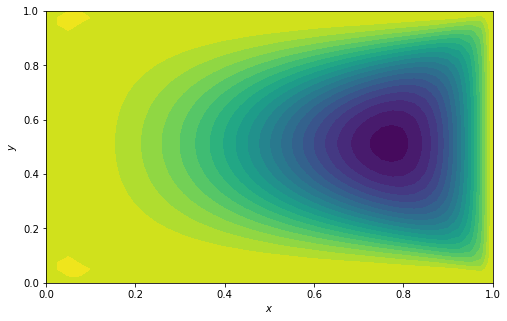

In [30]:
x=numpy.linspace(0, l, nx)
y=numpy.linspace(0, h, ny)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,w,20)
pyplot.contourf(x, y, p, 20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar

In [31]:
print(a, b)


0.0179879166173 116.604622487


In [9]:
w


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,  -0.00000000e+00,  -1.25297487e-04, ...,
          2.85198919e+01,   3.62136884e+01,  -1.20000000e+02],
       [  0.00000000e+00,  -1.11543976e-04,   1.54760562e-03, ...,
          3.19629978e+00,  -1.53269385e+01,  -7.81757123e+01],
       ..., 
       [  0.00000000e+00,   1.61854622e-03,   3.26322817e-03, ...,
         -7.91184555e+00,  -2.25422069e+01,  -4.65953142e+01],
       [  0.00000000e+00,  -1.11543976e-04,   1.54760562e-03, ...,
          3.19629978e+00,  -1.53269385e+01,  -7.81757123e+01],
       [  0.00000000e+00,  -0.00000000e+00,  -1.25297487e-04, ...,
          2.85198919e+01,   3.62136884e+01,   0.00000000e+00]])